# Assessment 2



In [1]:
import numpy as np
import matplotlib.pyplot as plt

[array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), array([1.06729438e-07, 0.00000000e+00, 0.00000000e+00]), array([-1.06394938e-07,  0.00000000e+00,  0.00000000e+00]), arr

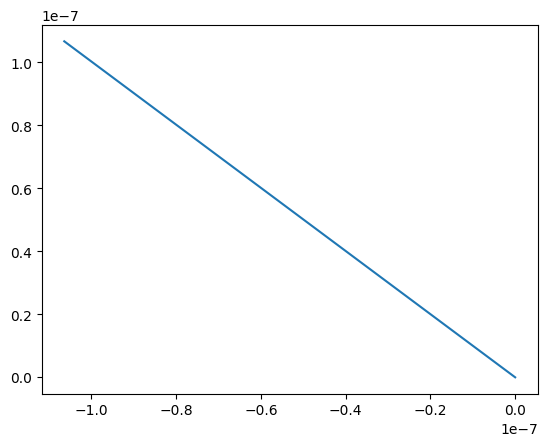

In [35]:
epsilon = 125.7 * 0.36e-9
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

N = 2

def force_coefficient(r):
    return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)

def force_coefficient_2(r):
    return 24 * epsilon / sigma * (-2 * (sigma / r) ** 13 + (sigma / r) ** 7)

pos = np.zeros((N, 3))
pos[0] = np.array([sigma, 0, 0])

vel = np.zeros((N, 3))

acc = np.zeros((N, 3))

dt = 0.0001
timesteps = 1000

stored_pos = []

def calculate_force(pos_p, pos_j):
    r = np.linalg.norm(pos_p - pos_j)
    r_hat = (pos_p - pos_j) / r
    return force_coefficient_2(r) * r_hat

def update(pos, vel, acc, dt):
    vel += acc * dt * 0.5
    pos += vel * dt
    vel += acc * dt * 0.5
    return pos, vel

for t in range(timesteps):
    for p in range(N):
        acc[p] = np.zeros(3)
        for j in range(N):
            if p != j:
                acc[p] += calculate_force(pos[p], pos[j]) / argon_mass
    for p in range(N):
        pos[p], vel[p] = update(pos[p], vel[p], acc[p], dt)
        stored_pos.append(pos[p])

print(stored_pos)
fig, ax = plt.subplots()
ax.plot(stored_pos[:][0], stored_pos[:][1])